Color adjustment
================

In this tutorial we are going to learn how to adjust the color in image batches.

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In [3]:
# We use OpenCV to load an image to memory represented in a numpy.array
img_bgr: np.array = cv2.imread('../data/ninja_turtles.jpg', cv2.IMREAD_COLOR)

In [4]:
# Convert the numpy array to torch
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = kornia.bgr_to_rgb(x_bgr)

In [5]:
# Create batch and normalize
x_rgb = x_rgb.expand(4, -1, -1, -1)  # 4xCxHxW
x_rgb = x_rgb.float() / 255.

In [7]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')

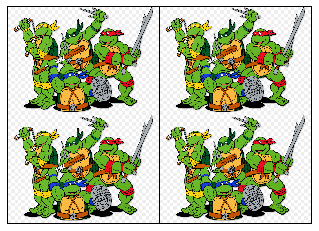

In [8]:
# Show original
imshow(x_rgb)

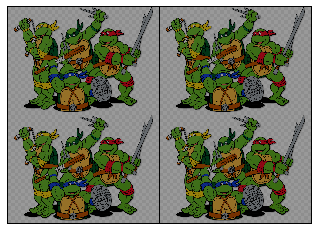

In [9]:
# Adjust Brightness
x_brightness: torch.Tensor = kornia.adjust_brightness(x_rgb, 0.6)
imshow(x_brightness)

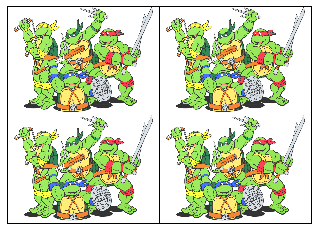

In [10]:
# Adjust Contrast
x_contrast: torch.Tensor = kornia.adjust_contrast(x_rgb, 0.2)
imshow(x_contrast)

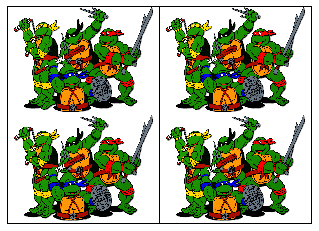

In [11]:
# Adjust Gamma
x_gamma: torch.Tensor = kornia.adjust_gamma(x_rgb, gamma=3., gain=1.5)
imshow(x_gamma)

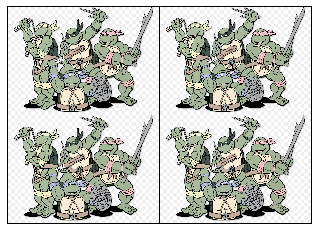

In [12]:
# Adjust Saturation
x_saturated: torch.Tensor = kornia.adjust_saturation(x_rgb, 0.2)
imshow(x_saturated)

In [ ]:
# Adjust Hue
x_hue: torch.Tensor = kornia.adjust_hue(x_rgb, 0.5)
imshow(x_hue)